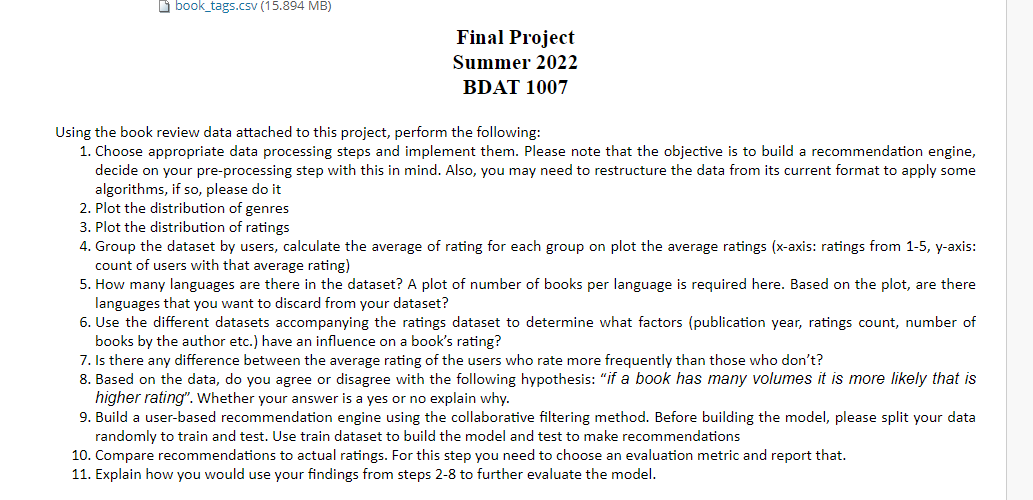

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import dataset**

In [2]:
books_data = pd.read_csv('/content/drive/MyDrive/Project/Recommendation/books(1).csv')
tags_data = pd.read_csv('/content/drive/MyDrive/Project/Recommendation/tags(1).csv')
ratings_data = pd.read_csv('/content/drive/MyDrive/Project/Recommendation/ratings(1).csv')
book_tags = pd.read_csv('/content/drive/MyDrive/Project/Recommendation/book_tags(1).csv')


# **1.**

**Data Preprocessing**

In [3]:
books_data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
books_data.shape

(10000, 23)

**Missing values**

In [5]:
books_data.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [6]:
books_data = books_data.dropna()


**Features of book_data**

In [7]:
books_data.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

**Drop unwanted columns**

In [8]:
books_data = books_data.drop(columns=['id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'image_url','small_image_url'])
books_data.head()

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664


**Rating Dataset**

In [9]:
ratings_data.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


**Missing values of rating dataset**

In [10]:
ratings_data.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

**mean rating per user**

In [11]:
# mean rating per user

mean_rating_per_user = ratings_data.groupby(['user_id']).mean().reset_index()
mean_rating_per_user['mean_rating'] = mean_rating_per_user['rating']

mean_rating_per_user.drop(['book_id','rating'],axis=1, inplace=True)

In [12]:
mean_rating_per_user.head()

,user_id,mean_rating
0,1,3.666667
1,2,4.333333
2,3,1.000000
3,4,4.000000
4,5,4.200000


**Book Tags**

In [13]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [14]:
book_tags.shape

(999912, 3)

In [15]:
book_tags.isnull().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

**Drop Duplicated**

In [16]:
ratings_data = ratings_data.sort_values("user_id")
ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 
books_data.drop_duplicates(subset='original_title',keep=False,inplace=True)
book_tags.drop_duplicates(subset='tag_id',keep=False,inplace=True)


## **2.**
**Distribution of Genre**

In [17]:
import plotly.express as px

In [18]:
top_author_counts = books_data['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig = px.bar(top_author_counts.tail(10), x="count", y="value", orientation='h', color='value',
             width=1000, height=700)
fig.show()

# **3.**
**distribution of ratings**

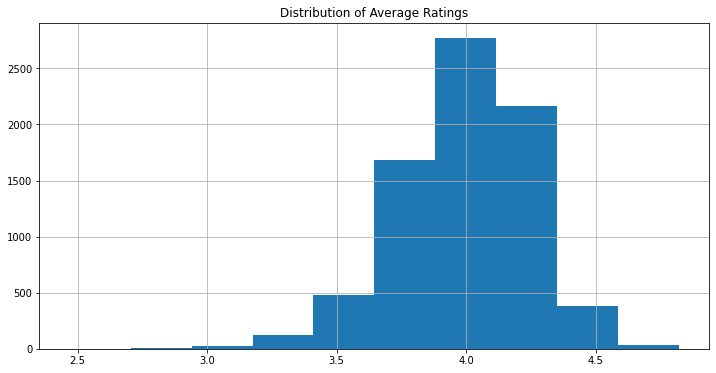

In [19]:
#distribution of average ratings of all the 10000 books
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Distribution of Average Ratings")
books_data["average_rating"].hist()
display()

# **4.**

In [20]:
# Mean rating per user

mean_rating_per_user = ratings_data.groupby(['user_id']).mean().reset_index()
mean_rating_per_user['mean_rating'] = mean_rating_per_user['rating']

mean_rating_per_user.drop(['book_id','rating'],axis=1, inplace=True)
mean_rating_per_user.head(15)

,user_id,mean_rating
0,1,3.666667
1,2,4.333333
2,3,1.000000
3,4,4.000000
4,5,4.200000
5,6,4.500000
6,7,3.797297
7,8,3.666667
8,9,3.142857
9,10,3.750000


In [21]:
rating_data = pd.merge(ratings_data, mean_rating_per_user, on=['user_id', 'user_id'])
rating_data.head(200)

,book_id,user_id,rating,mean_rating
0,1180,1,4,3.666667
1,4893,1,3,3.666667
2,6285,1,4,3.666667
3,8034,2,4,4.333333
4,8855,2,5,4.333333
...,...,...,...,...
195,9575,22,3,3.578947
196,7568,22,3,3.578947
197,9526,22,3,3.578947
198,4731,22,4,3.578947


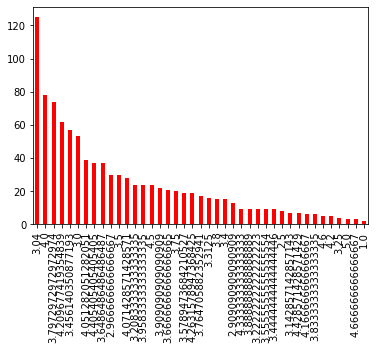

In [22]:
rating_data=rating_data.head(1000)
rating_data['mean_rating'].value_counts().plot(kind='bar',color='r')

# **5.**

In [23]:
num_languages= len(books_data['language_code'].unique())
print("The numbers of languages in the dataset is ",num_languages)
lang= books_data['language_code'].value_counts().reset_index()
lang.columns = ['Language', 'Count of books']
lang['Language'] = lang['Language']
lang = lang.sort_values('Count of books')
fig = px.bar(lang.tail(10), x="Count of books", y="Language", title='Languages', orientation='h', color='Count of books',
             width=1000, height=700)
fig.show()

The numbers of languages in the dataset is  23


# **6.**

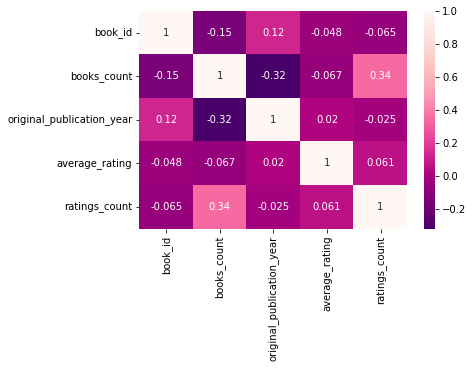

In [24]:
corr=books_data.corr()
sns.heatmap(corr,annot=True,cmap='RdPu_r')

# **7.**

Yes there is major difference that we see in part 4  between average rating of frequent user and user who didn't do.

# **8**
**Test Hypothesis**

In [25]:
H0 = 'Books has many volumns its mean its have higher rating'
Ha = 'Books has many volumns doesnt mean that its have higher rating'

In [26]:
alpha = 0.05

In [27]:
from scipy.stats import ttest_ind

In [28]:
books_data.head()

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664
5,11870085,226,John Green,2012.0,The Fault in Our Stars,eng,4.26,2346404


**2 samples t-test**

In [29]:
def t_test(df):


  print('n' + "*** 2 Sample T Test Results ***")

  test_results = ttest_ind(books_data['book_id'], books_data['average_rating'], equal_var=True)

  p = round(test_results[1],2)

  if p>alpha:
    print(f"{p} > {alpha}. We fail to reject Null Hypothesis. {H0}")

  else:


    print(f"{p} <= {alpha}. We reject Null Hypothesis. {Ha}")

In [30]:
t_test(books_data)

n*** 2 Sample T Test Results ***
0.0 <= 0.05. We reject Null Hypothesis. Books has many volumns doesnt mean that its have higher rating


# **9**

In [31]:
books = pd.read_csv('/content/drive/MyDrive/Project/Recommendation/books(1).csv')

In [32]:
ratings_data = pd.read_csv('/content/drive/MyDrive/Project/Recommendation/ratings(1).csv')

In [33]:
! pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
v = books['ratings_count']
m = books['ratings_count'].quantile(0.95)
R = books['average_rating']
C = books['average_rating'].mean()
W = (R*v + C*m) / (v + m)

In [35]:
books['weighted_rating'] = W

In [36]:
qualified  = books.sort_values('weighted_rating', ascending=False).head(250)

In [37]:
qualified[['title', 'authors', 'average_rating', 'weighted_rating']].head(15)

,title,authors,average_rating,weighted_rating
24,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",4.61,4.555956
26,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",4.54,4.490428
17,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",4.53,4.485090
23,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",4.53,4.483227
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,4.424365
20,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",4.46,4.419054
30,The Help,Kathryn Stockett,4.45,4.405158
38,"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,4.45,4.398759
134,"A Storm of Swords (A Song of Ice and Fire, #3)",George R.R. Martin,4.54,4.396645
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,4.391147


**User Based Recommendation**

In [38]:
merged_df = pd.merge(books, ratings_data, how='left', left_on=['id'], right_on=['book_id'])
df = merged_df[['id','original_title', 'user_id', 'rating']]

df = df.rename(columns = {'id':'book_id'})
df.head(200)

,book_id,original_title,user_id,rating
0,1,The Hunger Games,314,5
1,1,The Hunger Games,439,3
2,1,The Hunger Games,588,5
3,1,The Hunger Games,1169,4
4,1,The Hunger Games,1185,4
...,...,...,...,...
195,2,Harry Potter and the Philosopher's Stone,51166,5
196,2,Harry Potter and the Philosopher's Stone,51460,4
197,2,Harry Potter and the Philosopher's Stone,51838,4
198,2,Harry Potter and the Philosopher's Stone,52036,3


In [39]:
df.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [40]:
ratings_df = df.pivot_table(index='book_id',columns='user_id',values='rating').fillna(0)

pd.set_option('display.max_columns', 100)
ratings_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,53375,53376,53377,53378,53379,53380,53381,53382,53383,53384,53385,53386,53387,53388,53389,53390,53391,53392,53393,53394,53395,53396,53397,53398,53399,53400,53401,53402,53403,53404,53405,53406,53407,53408,53409,53410,53411,53412,53413,53414,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
ratings_df.shape

(10000, 53424)

In [42]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [43]:
ratings_matrix = csr_matrix(ratings_df.values)

**KNN**

In [44]:
model_knn = NearestNeighbors(metric='cosine', algorithm = 'brute')
model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [45]:
def get_book_id(book_title):
    target_df = df.loc[df['original_title'] == book_title]
    return target_df['book_id'].iloc[0]

id_TheHungerGames = get_book_id('The Hunger Games')
print(id_TheHungerGames)

1


In [46]:
def get_title(book_id):
    target_df = df.loc[df['book_id'] == book_id]
    return target_df['original_title'].iloc[0]

print(get_title(1))

The Hunger Games


In [47]:
def get_recomm(book_title, num_neighbors=10, display=False): 
    book_ids = []
    
    query_index = get_book_id(book_title) - 1
    
    if num_neighbors > 0:
        distances, indices = model_knn.kneighbors(ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = num_neighbors + 1)
    else:
        distances, indices = model_knn.kneighbors(ratings_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10 + 1)
    
    for i in range(0, len(distances.flatten())):
        if display is True:
            if i == 0:
                print('Recommendations for ', book_title, '\n')
            else:    
                print('{0}\t Book ID: {1}\t  Distance: {2}:\n'.format(i, ratings_df.index[indices.flatten()[i]], distances.flatten()[i]))
        
        book_ids.append(ratings_df.index[indices.flatten()[i]])
    
    return book_ids

In [48]:
# Top 10 recommendations for The Hunger Games

recommendations_for_TheHungerGames = get_recomm('The Hunger Games', num_neighbors=10, display=True)

Recommendations for  The Hunger Games 

1	 Book ID: 17	  Distance: 0.4053256862294832:

2	 Book ID: 31	  Distance: 0.42674642418525066:

3	 Book ID: 2	  Distance: 0.4444738573252147:

4	 Book ID: 20	  Distance: 0.4523031603835689:

5	 Book ID: 3	  Distance: 0.49084774300774026:

6	 Book ID: 93	  Distance: 0.5119913445564398:

7	 Book ID: 5	  Distance: 0.5197672572777041:

8	 Book ID: 16	  Distance: 0.5229117539369219:

9	 Book ID: 9	  Distance: 0.5271915645842881:

10	 Book ID: 37	  Distance: 0.5278079122055651:



In [49]:
for b in recommendations_for_TheHungerGames[1:]:
    print('id:', b, '\t\tBook: ', get_title(b))

id: 17 		Book:  Catching Fire
id: 31 		Book:  The Help
id: 2 		Book:  Harry Potter and the Philosopher's Stone
id: 20 		Book:  Mockingjay
id: 3 		Book:  Twilight
id: 93 		Book:  The Secret Garden
id: 5 		Book:  The Great Gatsby
id: 16 		Book:  Män som hatar kvinnor
id: 9 		Book:  Angels & Demons 
id: 37 		Book:  The Lion, the Witch and the Wardrobe


In [50]:
# Top 10 recommendations for Harry Potter and the Philosopher's Stone

book_ids_for_H = get_recomm('Harry Potter and the Philosopher\'s Stone', num_neighbors=10)
# skip the first item
for b in book_ids_for_H[1:]:
    print(get_title(b))

To Kill a Mockingbird
Memoirs of a Geisha
Nineteen Eighty-Four
The Great Gatsby
 The Fellowship of the Ring
Lord of the Flies 
Harry Potter and the Prisoner of Azkaban
The Hobbit or There and Back Again
Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944
Jane Eyre


In [51]:
# Top 15 recommendations for Twilight

book_ids_for_H = get_recomm('Twilight', num_neighbors=15)
for b in book_ids_for_H[1:]:
    print(get_title(b))

Harry Potter and the Philosopher's Stone
Pride and Prejudice
The Hunger Games
Memoirs of a Geisha
The Kite Runner 
The Catcher in the Rye
The Book Thief
O Alquimista
The Giver
Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944
 The Fellowship of the Ring
Män som hatar kvinnor
The Lovely Bones
Jane Eyre
Fahrenheit 451


**SVD**

In [52]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [53]:
df=ratings_data[['user_id', 'book_id', 'rating']]

In [54]:
df.head()

,user_id,book_id,rating
0,314,1,5
1,439,1,3
2,588,1,5
3,1169,1,4
4,1185,1,4


In [55]:
x=df.drop(['rating'],axis=1)

In [56]:
y=df['rating']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [58]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
svd.fit(x_train,y_train)

TruncatedSVD(n_components=1, n_iter=7, random_state=42)

In [59]:
print(svd.explained_variance_ratio_)

[0.94824913]


In [60]:
print(svd.explained_variance_ratio_.sum())

0.948249133613154


In [61]:
print(svd.singular_values_)

[24971343.41632138]


# **10**

In [62]:
reader = Reader()
data = Dataset.load_from_df(ratings_data[['user_id', 'book_id', 'rating']], reader)

**Evaluation Metrics**

In [63]:
svd  = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'fit_time': (64.52525353431702,
  64.49820351600647,
  66.45789647102356,
  62.94503951072693,
  76.97407722473145),
 'test_mae': array([0.65960592, 0.65761826, 0.66067593, 0.66065846, 0.65862438]),
 'test_rmse': array([0.8440655 , 0.84138555, 0.84456529, 0.84448311, 0.84217464]),
 'test_time': (3.1106197834014893,
  2.663877487182617,
  2.615717649459839,
  2.989926338195801,
  3.0941355228424072)}

In [64]:
trainset = data.build_full_trainset()
svd.fit(trainset);

In [65]:
ratings_data[ratings_data['user_id'] == 10]

,book_id,user_id,rating
150478,1506,10,4
282986,2833,10,4
340448,3409,10,5
393966,3946,10,5
452158,4531,10,4
506878,5084,10,2
588312,5907,10,4
590191,5926,10,2
610487,6131,10,2
696035,7002,10,5


In [66]:
svd.predict(10, 1506)

Prediction(uid=10, iid=1506, r_ui=None, est=3.567405392990115, details={'was_impossible': False})

# **11**

YES the distribution of rating  is left skewed in part 3 and in part 4 the distribution is right skewed so its mean our dataset is not normal and some where our datasets is unbalanced so we need to built a robust model on that thats help us to do good  recommendation.
And in next task wehere we check the correlation of features and conclude that average rating and publication year is the most important columns 
and after that our hypothesis of 2 sample t-test  also reject null hypothesis so  that Books has many volumns doesnt mean that its have higher rating.